## Environment Setup

In [0]:
# IMPORTS *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd           #C ALL COMMENTS
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
import imblearn

import warnings
warnings.filterwarnings('ignore') #SUPPRESSING WARNINGS


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Loading Data

In [0]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

# Load NSL_KDD train dataset
data = pd.read_csv('drive/My Drive/AML-Project/data.csv').iloc[:,:-1]#*
dfkdd_train = data.iloc[:125973,:]


In [0]:

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Train dataset

### Test dataset

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


##Preprocessing Data

### Mapping of attack field to attack class 
 

In [0]:

mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [0]:
# Apply attack class mappings to the dataset
data['attack_class'] = data['attack'].map(mapping)

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal


In [0]:
# Drop attack field from both train and test data
data.drop('attack', axis = 'columns', inplace = True)

In [0]:
# Checking data entries 
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


### Exploratory Analysis on Data

In [0]:
# Descriptive statistics
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.0,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,0.001508,0.000976,0.273726,0.012073,0.000525,0.004013,0.0,0.000081,0.012308,83.336561,28.251937,0.256925,0.255337,0.137947,0.138487,0.672983,0.067761,0.097441,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,0.038807,0.042389,22.689023,0.517863,0.027701,0.095257,0.0,0.008988,0.110259,116.760741,75.369635,0.431918,0.432578,0.339387,0.341783,0.436544,0.194666,0.258886,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,141.000000,17.000000,0.850000,0.910000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
data.num_outbound_cmds.describe() #*

count    148517.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [0]:
#Removing 'num_outbound_cmds' feild since it only contains zeros
data.drop('num_outbound_cmds',axis = 'columns', inplace = True)#*

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [0]:
#Distribution of target class
from collections import Counter

dist = pd.DataFrame(Counter(data['attack_class']).items())
dist = dist.set_index(dist[0]).drop(0,axis = 'columns')

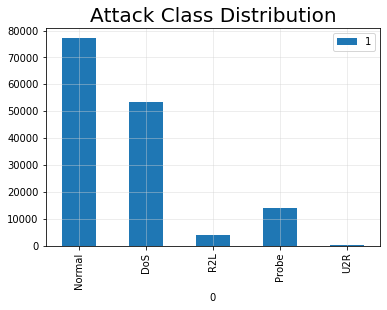

In [0]:
# dist plot *
plot = dist[[1]].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [0]:
data.head()
data_original = data.copy()#****for famd

###Standardization of Numerical Attributes

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = data.select_dtypes(include=['float64','int64']).columns
#*
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64','int64']))


#*
scaled_df = pd.DataFrame(scaled_data,columns = num_cols)

In [0]:
scaled_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.696611,-0.348310,-0.594848,-0.590270,-0.406460,-0.405192,0.749108,-0.348092,-0.376389,-0.344349,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.602401,-0.361578,-0.594848,-0.590270,-0.406460,-0.405192,-1.358363,0.422462,-0.376389,0.721338,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,0.339700,-0.295238,1.720415,1.721459,-0.406460,-0.405192,-1.427085,0.011499,-0.376389,0.721338,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.670918,-0.308506,-0.131796,-0.127924,-0.406460,-0.405192,0.749108,-0.348092,-0.376389,-1.562277,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.456804,0.049729,-0.594848,-0.590270,-0.406460,-0.405192,0.749108,-0.348092,-0.028744,0.721338,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112481,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.705176,-0.361578,-0.594848,-0.590270,-0.406460,-0.405192,0.749108,-0.348092,-0.376389,-0.851819,0.193625,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815
148513,-0.112481,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.696611,-0.228898,-0.594848,-0.590270,-0.406460,-0.405192,0.749108,-0.348092,0.318901,0.132673,1.218511,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815
148514,-0.112481,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,-0.059832,1.217658,0.033509,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.670918,-0.242166,-0.594848,-0.590270,-0.406460,-0.405192,0.749108,-0.348092,0.396156,0.721338,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035
148515,-0.112481,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,-0.008989,-0.111632,-0.679482,-0.295238,-0.594848,-0.590270,-0.406460,-0.405192,0.749108,-0.348092,0.898310,0.721338,1.191540,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.42

### Encoding Categorical Attributes

In [0]:
#Do this before above step
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

#selecting all categorical data
categorical_data = data.select_dtypes(include=['object']).copy()

#label encoding categorical data
categorical_data = categorical_data.apply(enc.fit_transform)


In [0]:
categorical_data.head()

,protocol_type,service,flag,attack_class
0,1,20,9,1
1,2,44,9,1
2,1,49,5,0
3,1,24,9,1
4,1,24,9,1


### Over-Sampling using SMOTE 

In [0]:
#Defining data and label
X,y = pd.concat([scaled_df,categorical_data],axis='columns').drop('attack_class',axis='columns'),categorical_data['attack_class']

In [0]:
#reference to columns 
columns_reference = pd.concat([scaled_df,categorical_data],axis='columns').columns

In [0]:
#over sampling 
from imblearn.over_sampling import SMOTE # uses KNN to generate new samples
from collections import Counter

#Synthetic Minority Over-Sampling Technique
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

#Splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2)

In [0]:
# new distribution of target class

new_dist = Counter(y_resampled).items() #shows that there are equal amounts in each class
new_dist = pd.DataFrame(new_dist,index=['Normal','DoS','Probe','U2R','R2L'])
new_dist

,0,1
Normal,1,77054
DoS,0,77054
Probe,3,77054
U2R,2,77054
R2L,4,77054


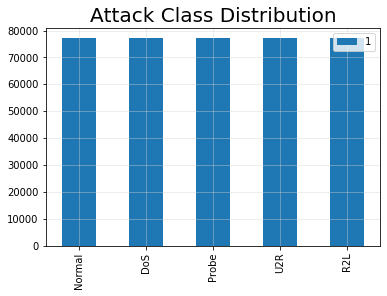

In [0]:
# new dist plot 
plot = new_dist[[1]].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

### Feature Selection

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();


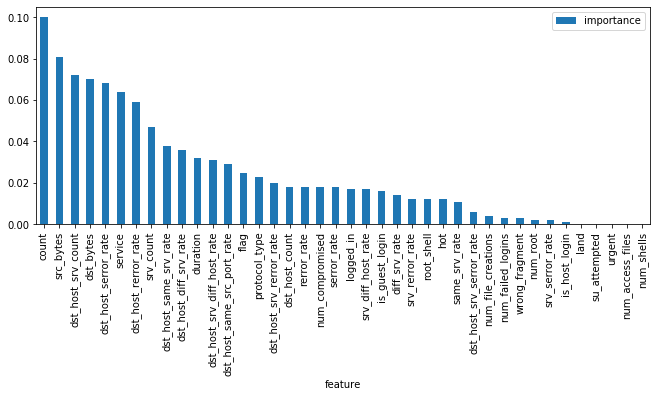

In [0]:
# fitting data 
rfc.fit(X_train, y_train);

# extracting most important features
score = np.round(rfc.feature_importances_,3)
important_features = pd.DataFrame({'feature':pd.concat([scaled_df,categorical_data],axis='columns').drop('attack_class',axis='columns').columns,'importance':score})
important_features = important_features.sort_values('importance',ascending=False).set_index('feature')

# plotting important features
plt.rcParams['figure.figsize'] = (11, 4)
important_features.plot.bar();

In [0]:
#features from random forest classifier 
rf_features = important_features.index[:23] #represents about 90 of data
rf_features

Index(['count', 'src_bytes', 'dst_host_srv_count', 'dst_bytes',
       'dst_host_serror_rate', 'service', 'dst_host_rerror_rate', 'srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'duration',
       'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'flag',
       'protocol_type', 'dst_host_srv_rerror_rate', 'dst_host_count',
       'rerror_rate', 'num_compromised', 'serror_rate', 'logged_in',
       'srv_diff_host_rate', 'is_guest_login'],
      dtype='object', name='feature')

In [0]:
#converting categorical data into numeric type
for i in categorical_data.columns:
  data[i] = categorical_data[i].astype(np.float64)

In [0]:
#!pip3 install prince

In [0]:
#FAMD factor analysis mix data
import prince

data_to_reduce = data_original.drop('attack_class',axis = 'columns')

famd = prince.FAMD(n_components = 15,
                   n_iter = 5,
                   copy = True,
                   check_input = True,
                   engine = 'auto',
                   random_state = 10)
#reference to factor analyzer 
famd = famd.fit(data_to_reduce)

In [0]:
#reference to reduced data
reduced_data = famd.transform(data_to_reduce)

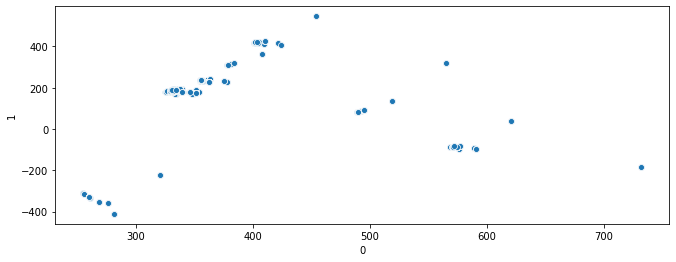

In [0]:
#scatter plot on reduced data
sns.scatterplot(reduced_data[0],reduced_data[1])

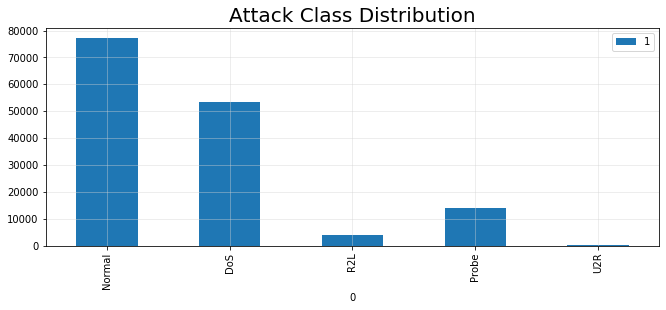

In [0]:
# comporing scatter plot with original distributed plot
plot = dist[[1]].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [0]:
#amount of representation of data by each component 
component_contributions = sorted(famd.explained_inertia_,reverse=True)
component_contributions

[0.46700777775595614,
 0.16022238963875848,
 0.08327165854996861,
 0.04823368245076257,
 0.040073929511363175,
 0.03425824775665499,
 0.02493597348067734,
 0.017713076135673314,
 0.012901846583136506,
 0.01053514369674142,
 0.009578922563370026,
 0.008501264635998153,
 0.0067800692813366065,
 0.005526938749300021,
 0.004413218874631453]

In [0]:
#90% of the data is contained within the first 10 components
sum(component_contributions[:11])

0.9087326481230625

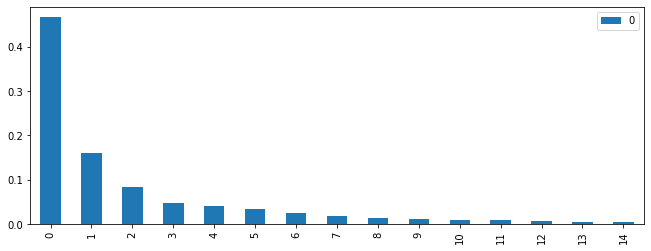

In [0]:
#plotting 
pd.DataFrame(component_contributions).plot(kind = 'bar')

In [0]:
famd_features = reduced_data

In [0]:
#Feature Selection using correlations
corr_matrix = data.corr()
correlations = pd.DataFrame(corr_matrix['attack_class'].sort_values())
corr_features = correlations[(correlations < - 0.2)|(correlations > 0.2)].dropna()

corr_features 

,attack_class
dst_host_srv_serror_rate,-0.593204
serror_rate,-0.590720
srv_serror_rate,-0.590668
dst_host_serror_rate,-0.590445
count,-0.433400
dst_host_count,-0.370821
dst_host_diff_srv_rate,0.251099
srv_diff_host_rate,0.257739
dst_host_srv_count,0.269703
logged_in,0.289750


### Dataset  Partition

In [0]:
#concatinated data
new_data = pd.DataFrame(np.concatenate((X_resampled,y_resampled[:,np.newaxis]),axis = 1),columns = columns_reference)

In [0]:
#data and target for different feature selection techniques 
rf_X = new_data[rf_features]

famd_X = pd.DataFrame(famd_features.iloc[:,:11])

corr_X = new_data[corr_features.index].drop('attack_class',axis = 'columns')

y = new_data['attack_class']

y2 = data_original['attack_class']

## Model Selection using cross-val-score

In [0]:
#imports for models . 
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

######try_model function

In [0]:
def try_model(model, X, y):
  #splitting train and test data
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) 

  # Training  KNN Model
  m = model
  m.fit(X_train, y_train)
 
  print ("Cross_Validation_Mean_Score:""\n",cross_val_score(m,X_train,y_train,cv=5).mean())
  print()
  print (" Accuracy:" "\n",metrics.accuracy_score(y_test, m.predict(X_test)))
  print()
  print("Confusion Matrix:" "\n",metrics.confusion_matrix(y_test, m.predict(X_test)))
  print()
  print("Classification_Report:" "\n", metrics.classification_report(y_test, m.predict(X_test))) 
  print()


#####models

In [0]:
# Training  KNN Model
knn_classifier = KNeighborsClassifier()
print()
print('==============================KNN Model Evaluation ==============================')
print()

try_model(knn_classifier,corr_X,y)



==============================KNN Model Evaluation ==============================

Cross_Validation_Mean_Score:
 0.9753808972939663

 Accuracy:
 0.9773016326212786

Confusion Matrix:
 [[15144   146    14     6     5]
 [  179 14421    92   464   174]
 [    7    35 15441    85    10]
 [    1   156    34 15090   213]
 [    2    23     2   101 15209]]

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15315
         1.0       0.98      0.94      0.96     15330
         2.0       0.99      0.99      0.99     15578
         3.0       0.96      0.97      0.97     15494
         4.0       0.97      0.99      0.98     15337

    accuracy                           0.98     77054
   macro avg       0.98      0.98      0.98     77054
weighted avg       0.98      0.98      0.98     77054




In [0]:
# Training Logistic Regression Model
logr_classifier = LogisticRegression(n_jobs=-1, random_state=0)

print()
print('==============================Logistic Regression Model Evaluation ==============================')
print()
try_model(logr_classifier,res_corr_X,y)


==============================Logistic Regression Model Evaluation ==============================

Cross_Validation_Mean_Score:
 0.576170589758316

 Accuracy:
 0.5764528772030005

Confusion Matrix:
 [[11114   902  3029   437     5]
 [  209  7229  2070  5727   226]
 [ 1396  3568  5655  4275   471]
 [   22   358   133 14416   434]
 [    0     0   361  9013  6004]]

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79     15487
         1.0       0.60      0.47      0.53     15461
         2.0       0.50      0.37      0.42     15365
         3.0       0.43      0.94      0.59     15363
         4.0       0.84      0.39      0.53     15378

    accuracy                           0.58     77054
   macro avg       0.65      0.58      0.57     77054
weighted avg       0.65      0.58      0.57     77054




In [0]:
# Training Gaussian Naive Baye Model
nb_classifier = BernoulliNB()

print()
print('==============================Naive Bayes Model Evaluation ==============================')
print()
try_model(nb_classifier,res_corr_X,y)


==============================Naive Bayes Model Evaluation ==============================

Cross_Validation_Mean_Score:
 0.4886962731054326

 Accuracy:
 0.4880992550678745

Confusion Matrix:
 [[10580   286  3682   744     5]
 [  144  1343  2032 11772    75]
 [  918  1941  5691  6711     1]
 [   78     6   344 15053   120]
 [    0     0  1163  9422  4943]]

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.90      0.69      0.78     15297
         1.0       0.38      0.09      0.14     15366
         2.0       0.44      0.37      0.40     15262
         3.0       0.34      0.96      0.51     15601
         4.0       0.96      0.32      0.48     15528

    accuracy                           0.49     77054
   macro avg       0.60      0.49      0.46     77054
weighted avg       0.60      0.49      0.46     77054




In [0]:
# Training Decision Tree Model
dt_classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

print()
print('==============================Decision Tree Model Evaluation ==============================')
print()
try_model(dt_classifier,res_corr_X,y)


==============================Decision Tree Model Evaluation ==============================

Cross_Validation_Mean_Score:
 0.8015125868939155

 Accuracy:
 0.8032937939626755

Confusion Matrix:
 [[14537   607   162   134    16]
 [  374 13197   682   602   673]
 [  140   598 12779   704  1174]
 [   28   482  1267  8207  5503]
 [    1   121   662  1227 13177]]

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     15456
         1.0       0.88      0.85      0.86     15528
         2.0       0.82      0.83      0.83     15395
         3.0       0.75      0.53      0.62     15487
         4.0       0.64      0.87      0.74     15188

    accuracy                           0.80     77054
   macro avg       0.81      0.80      0.80     77054
weighted avg       0.81      0.80      0.80     77054




In [0]:
# Training RandomForestClassifier Model
rf_classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)

print()
print('==============================Random Forest Classifier Model Evaluation ==============================')
print()
try_model(rf_classifier,res_corr_X,y)


==============================Random Forest Classifier Model Evaluation ==============================

Cross_Validation_Mean_Score:
 0.8057531021840718

 Accuracy:
 0.8020738702727958

Confusion Matrix:
 [[14417   598   191   123    11]
 [  316 13128   670   614   644]
 [  145   568 12678   770  1208]
 [   38   470  1303  8187  5494]
 [    3   126   683  1276 13393]]

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95     15340
         1.0       0.88      0.85      0.87     15372
         2.0       0.82      0.82      0.82     15369
         3.0       0.75      0.53      0.62     15492
         4.0       0.65      0.87      0.74     15481

    accuracy                           0.80     77054
   macro avg       0.81      0.80      0.80     77054
weighted avg       0.81      0.80      0.80     77054


